MEDICAL INSURANCE COST PREDICION 

About the Dataset-

- age: age of primary beneficiary

- sex: insurance contractor gender, female, male

- bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
  objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

- children: Number of children covered by health insurance / Number of dependents

- smoker: Smoking

- region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

- charges: Individual medical costs billed by health insurance

In [80]:
#importing the dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sb
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

In [33]:
#importing the dataset into a dataframe
data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [34]:
data.shape

(1338, 7)

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### EXPLORATORY DATA ANALYSIS

In [36]:
#checking for null values
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [37]:
data.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

In [38]:
data.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

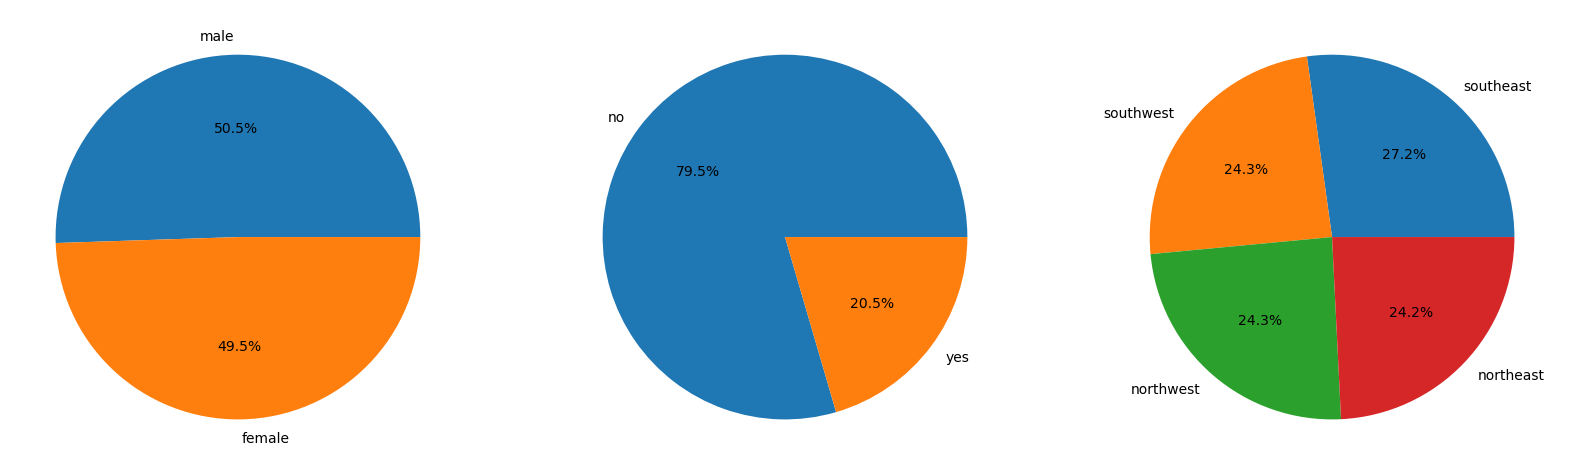

In [39]:
features = ['sex', 'smoker', 'region']
  
plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(1, 3, i + 1)
  
    x = data[col].value_counts()
    plt.pie(x.values,
            labels=x.index,
            autopct='%1.1f%%')
  
plt.show()

The data is equally distributed among the sex and region but smokers does not have the same distribution.

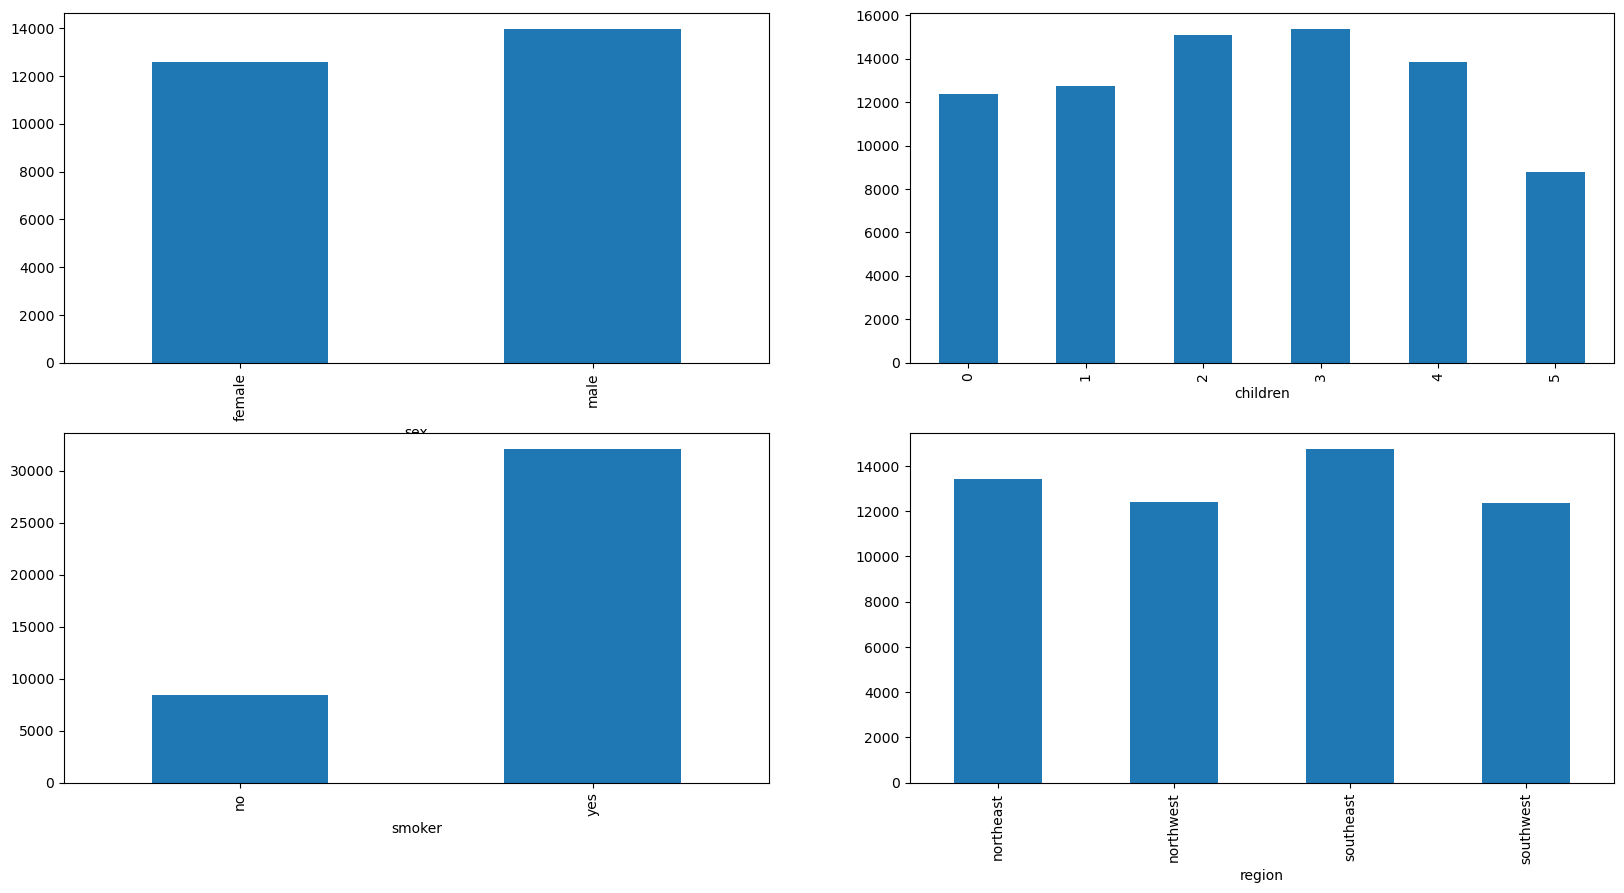

In [42]:
features = ['sex', 'children', 'smoker', 'region']
  
plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    data.groupby(col).mean()['charges'].plot.bar()
plt.show()

1. Males charge higher than the females.
2. Smokers are charged nearly three times higher than non-smokers.
3. Southwest region are charged more than the others.

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


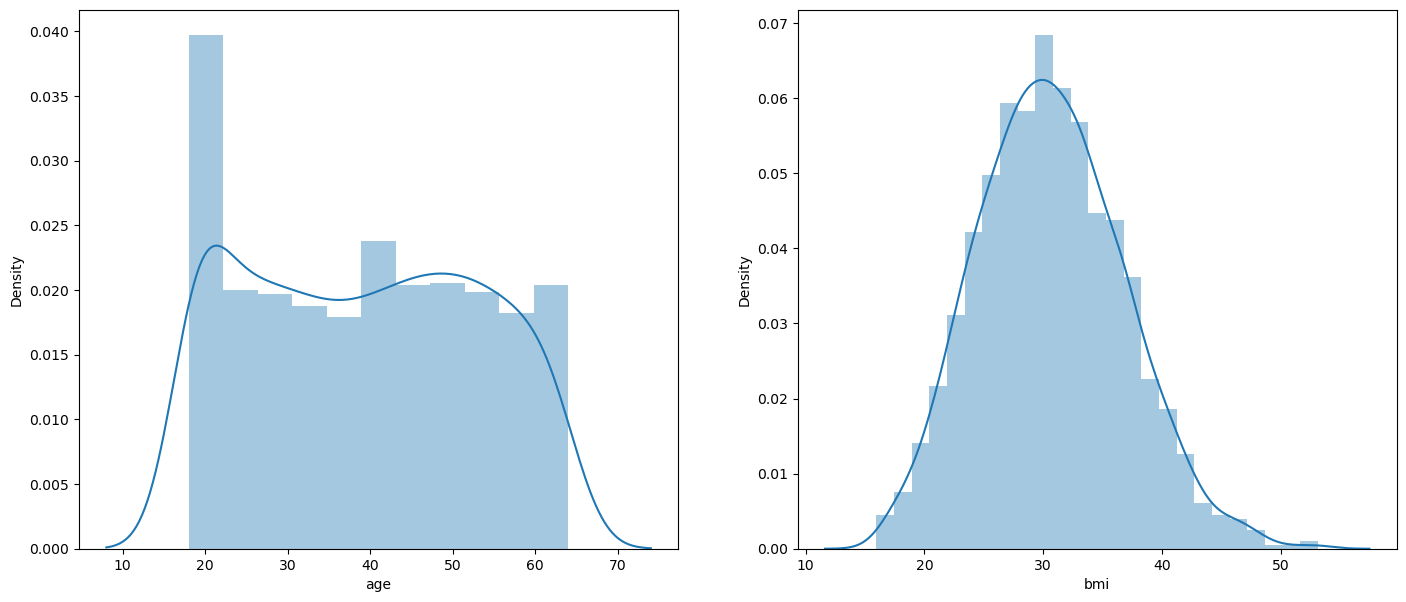

In [60]:
features = ['age', 'bmi']
  
plt.subplots(figsize=(17, 7))
for i, col in enumerate(features):
    plt.subplot(1, 2, i + 1)
    sb.distplot(data[col])
plt.show()

Data in both the age and BMI follow a normal distribution which is a good point with respect to model's learning.

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

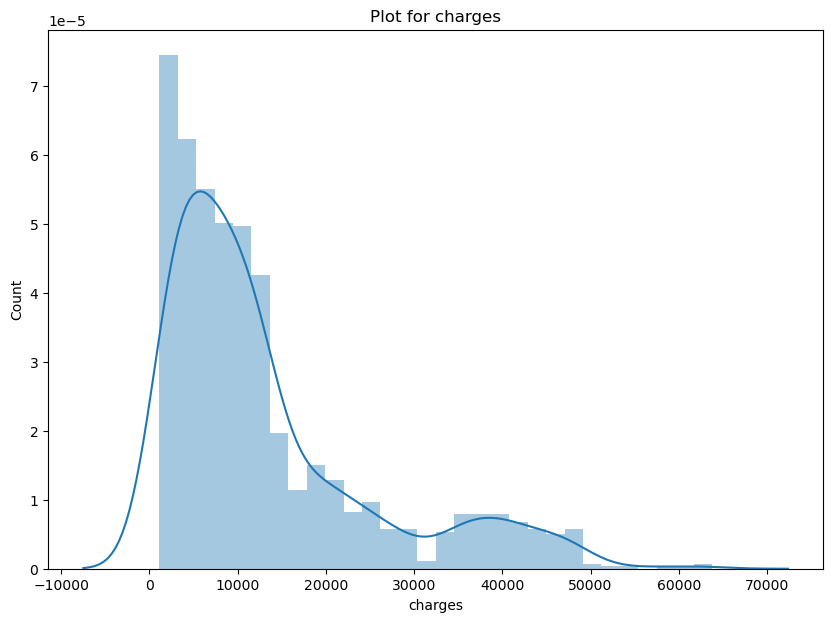

In [61]:
plt.figure(figsize=(10,7))
sns.distplot(data['charges'])
plt.title('Plot for charges')
plt.xlabel('charges')
plt.ylabel('Count')

There are some outliers in distribution of charges.

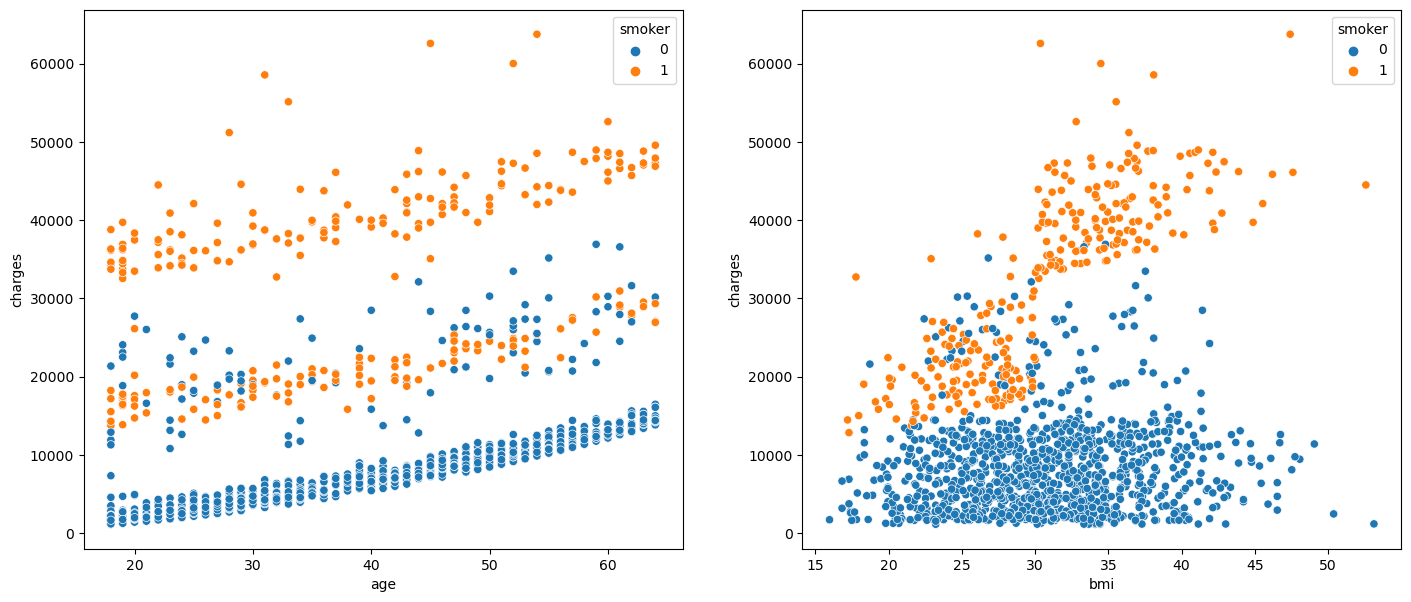

In [62]:
features = ['age', 'bmi']
  
plt.subplots(figsize=(17, 7))
for i, col in enumerate(features):
    plt.subplot(1, 2, i + 1)
    sb.scatterplot(data=data, x=col,
                   y='charges',
                   hue='smoker')
plt.show()

The scatter plot shows us that when the person smokes and aged, charged higher. So the age increases the premiums.

In [63]:
encoder = LabelEncoder()

In [64]:
labels = encoder.fit_transform(data.sex)

In [65]:
data['sex'] = labels

In [66]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


SEX

- MALE -> 1
- FEMALE -> 0

In [67]:
labels = encoder.fit_transform(data.region)

In [68]:
data['region'] = labels

In [69]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


REGION

- Northeast -> 0
- Northwest -> 1
- Southeast -> 2
- Southwest -> 3

In [70]:
labels = encoder.fit_transform(data.smoker)

In [71]:
data['smoker'] = labels

In [72]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


SMOKER 

- Yes -> 1
- No -> 0

FileNotFoundError: [Errno 2] No such file or directory: './sampleImages/Cor.png'

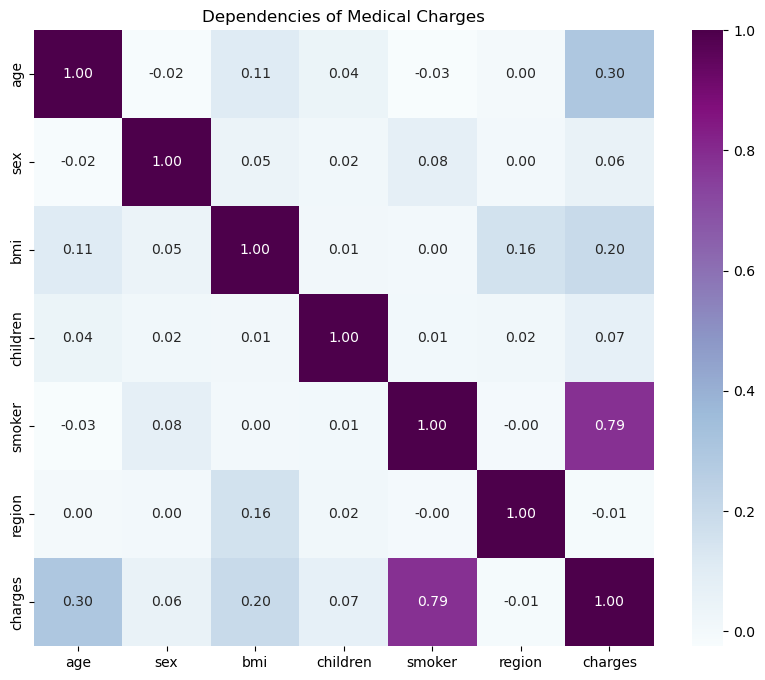

In [73]:
corr = data.corr()
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr,cmap='BuPu',annot=True,fmt=".2f",ax=ax)
plt.title("Dependencies of Medical Charges")
plt.savefig('./sampleImages/Cor')
plt.show()

There are three important factor that determines the charges respectively:
1. SMOKER (Most important)
2. AGE
3. BMI

In [19]:
#splitting the parameters and target variable
X = data.drop(columns='charges',axis=1)
Y = data['charges']

In [20]:
#train test split the dataset
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=101)

In [21]:
print(X.shape,X_train.shape,X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [76]:
models = [LinearRegression(), XGBRegressor(), RandomForestRegressor(), AdaBoostRegressor(), Lasso(), Ridge()]

In [78]:
for i in range(6):
    models[i].fit(X_train, Y_train)
  
    print(f'{models[i]} : ')
    pred_train = models[i].predict(X_train)
    print('Training Error : ', mape(Y_train, pred_train))
  
    pred_val = models[i].predict(X_test)
    print('Validation Error : ', mape(Y_test, pred_val))
    print()

LinearRegression() : 
Training Error :  0.44137989467563304
Validation Error :  0.4556864289290505

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...) : 
Training Error :  0.07725210298205902
Validation Error :  0.41490856356008504

RandomForestRegressor() : 
Training Error :  0.12694438188952326
Validation E

We have used Mean Absolute Percentage Error metric to evaluate the model's performance. Out of all models, RandomForestModel is giving the least value for the MAPE. This means predictions made by this model are close to the real values as compared to the other model. 

In [84]:
reg_rf = RandomForestRegressor()
parameters = { 'n_estimators':[600,1000,1200],
             'max_features': ["auto"],
             'max_depth':[40,50,60],
             'min_samples_split': [5,7,9],
             'min_samples_leaf': [7,10,12],
             'criterion': ['absolute_error']}

reg_rf_gscv = GridSearchCV(estimator=reg_rf, param_grid=parameters, cv=10, n_jobs=-1)
reg_rf_gscv = reg_rf_gscv.fit(X_train, Y_train.ravel())

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

In [ ]:
reg_rf_gscv.best_score_, reg_rf_gscv.best_estimator_

In [ ]:
rf_reg = RandomForestRegressor(max_depth=50, min_samples_leaf=12, min_samples_split=7,
                       n_estimators=1200)
rf_reg.fit(X_train, Y_train.ravel())

In [ ]:
cv_rf = reg_rf_gscv.best_score_

y_pred_rf_train = rf_reg.predict(X_train)
r2_score_rf_train = r2_score(Y_train, y_pred_rf_train)

y_pred_rf_test = rf_reg.predict(X_test)
r2_score_rf_test = r2_score(Y_test, y_pred_rf_test)

rmse_rf = np.sqrt(mean_squared_error(Y_test, y_pred_rf_test))

print('CV : {0:.3f}'.format(cv_rf.mean()))
print('R2 score (train) : {0:.3f}'.format(r2_score_rf_train))
print('R2 score (test) : {0:.3f}'.format(r2_score_rf_test))
print('RMSE : {0:.3f}'.format(rmse_rf))

In [28]:
#BULDING THE PREDICTION SYSTEM
input_data = (19,0,27.9,0,1,3)
input_data_array = np.asarray(input_data)

#reshaping the data so that it works for only one instance at a time
input_data_reshaped = input_data_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print('Predicted Medical Insurance Cost : ',str(prediction))



Predicted Medical Insurance Cost :  [17040.3915385]


/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Saving the trained model

In [29]:
import pickle

filename = 'medical_insurance_cost_predictor.sav'
pickle.dump(model, open(filename,'wb')) 